### Exercise 01. Types of Charts

In [ ]:
# Data can be separated into two main type: continuous and catgeorical
# Continuous data numerical values that are treated as numberical values
# Categorical data represents (usually non-numerical) defined categories

### Exercise 02. Installing and Importing Visualization Libraries

In [6]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Exercise 03. Creating Bar Charts

In [4]:
# Set path
path = r'C:\Users\lance\Documents\Achievement 4 Project'

In [7]:
# Import and define dataframe
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_combined_merged_new_variables_derived_aggregated.pkl'))

<Axes: xlabel='orders_day_of_week'>

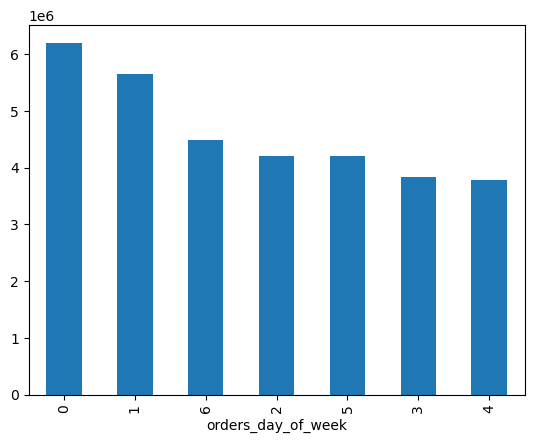

In [9]:
# Create a bar chart
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

In [ ]:
# On the left, you have your basic indexing syntax
# After the dot comes the function you want to execute, in this case, value_counts()
# An additional function comes in at the end, plot-bar()
# This tells Python to find the bar() function within the plot module and build the bar chart

In [12]:
# The sort_index() function will sort the bars in the chart according to their index order (rather than largest to smallest)
ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    6203324
1    5659298
2    4213105
3    3839865
4    3783172
5    4205076
6    4495887
Name: count, dtype: int64

In [ ]:
# The same can be done when printing frequencies

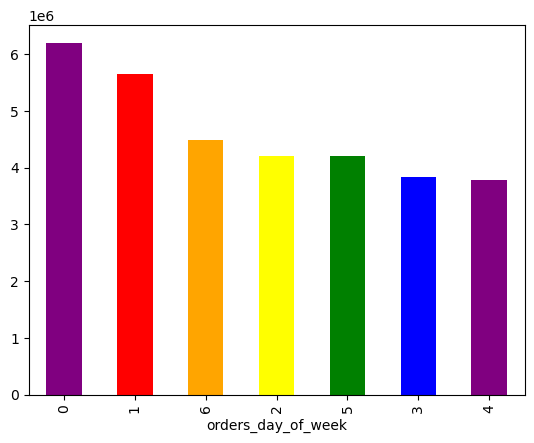

In [14]:
# To make the bars more distinct, you can also change their color
# Add a color argument in your plot.bar() function and listing the colors you want in order
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'orange', 'yellow', 'green', 'blue'])

### Exercise 04. Exporting Charts

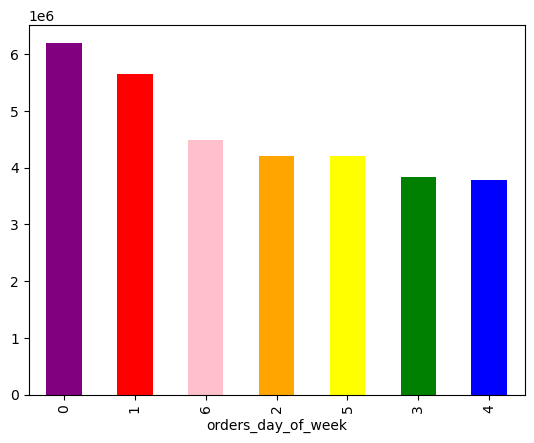

In [15]:
# The code above that generated the chart was a preview
# It must be saved into an object
# Now, it can be called by using bar.figure
# Finally, it can be exported using the figure.savefig() function
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [16]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

### Exercise 05. Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

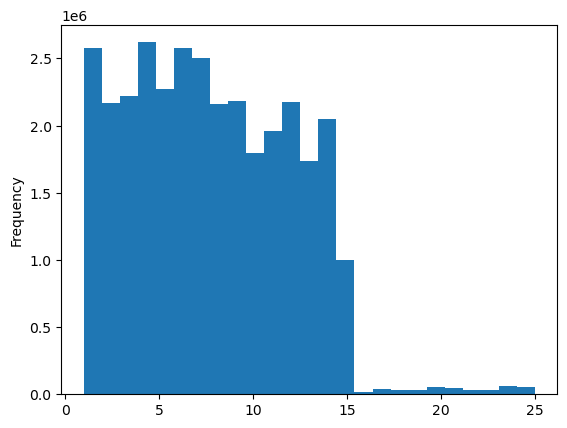

In [17]:
# A histogram can be made using the following code
ords_prods_merge['prices'].plot.hist(bins = 25)

In [ ]:
# It follows the same logic as the code for creating a bar chart
# The difference is in the use of hist() instead of bar() after the plot
# There's also an extra argument that goes within the parenthesis
# This is how you determine the granularity of the histogram
# A smaller number of bins equates to denser bars, while large number of bins equates to sparser bars

<Axes: xlabel='prices', ylabel='prices'>

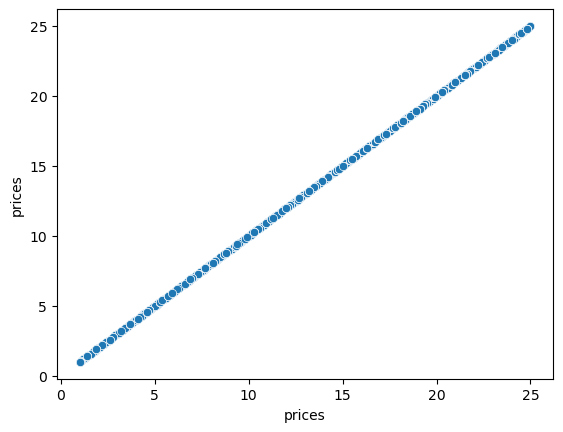

In [21]:
# Scatterplots are created using the scatterplot() function
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [22]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,customer_frequency,frequency_flag,average_spend,spender_flag


In [23]:
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

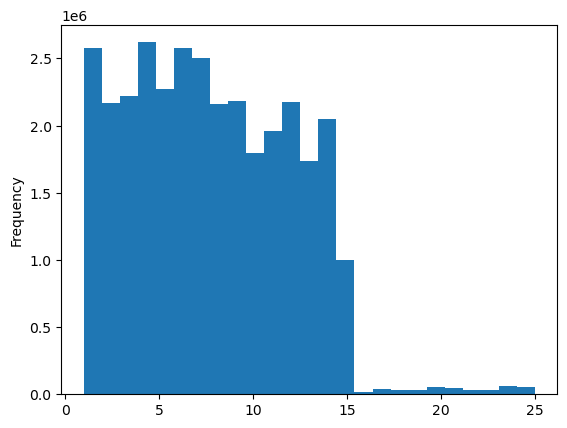

In [24]:
# Retry the histogram of the 'prices' column
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

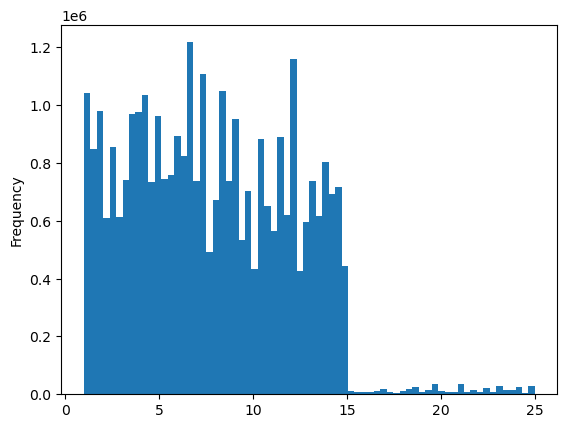

In [27]:
# To increase the level of granulrity in the histogram, simply increase the number of bins
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [28]:
# Export using the figure.savefig() function
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_price_frequency.png'))

### Exercise 06. Creating Line Charts

In [29]:
# Line charts are very memory intensive, so it'll be beneficial to sample data to avoid running into memory limitations

### Exercise 07. Sampling Data

In [30]:
# In order to create a subset that actually represents the entirety of your data, you'd need more than just the first 2,000,000 rows
# More importantly, these rows would need to be randomized
# Only then can you be sure that it accurately represents the dataframe as a whole

In [ ]:
# The first step is to create some random samples
# A sample, is a representative subsection of a population
# In this case, you can split the dataframe into two samples with the same distribution
# Creating these samples requires a list of random floating numbers between 0 and 1 and that's as long as the length of the dataframe
# Each row in the dataframe is assigned one of these numbers and then compared to a value
# In this case, the value is 0.7 since you want a 70/30 split
# Any rows whose assigned number is less than 0.7 are placed in one sample and those that are greater than 0.7 are placed in the other

In [31]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [32]:
# The 'seed' represents a random but reproducible pattern
# Python will always give you the same set of random numbers
# The seed is set via the NumPy function random.seed(), which set to 4
# In the second line, we've created a list called dev, this is where boolean values are stored
# Here, you get an output of True or False for every value based on whether it's less or equal to 0.7

In [33]:
dev

array([False,  True, False, ...,  True, False,  True])

In [ ]:
# The np.random.rand() function is being used as the argument
# This function is what will actually create your list of random floating numbers between 0 and 1
# The np at the beginning stands for NumPy
# The random in the middle is a function that creates random numbers
# The rand at the end is a function that ensures the random numbers generated by random follow the uniform distribution
# Within the brackets of the function, you'll see len(ords_prods_merge)
# This len() function produces a value that represents the length of whatever you put inside it
# By passing your dataframe, you'll recieve the amount of rows contain therein

In [34]:
# Now, we can split the dataframe into two samples 
big = ords_prods_merge[dev]
small = ords_prods_merge[~dev]

In [ ]:
# The two dataframes above, big and small, are the samples created from the ords_prods_merge dataframe
# 70% of the dataframe ges into big, while 30% goes into small
# This is done according to the values in the dev list

In [35]:
len(ords_prods_merge)

32399727

In [36]:
len(big) + len(small)

32399727

In [1]:
# The row values from big and small add up to the dataframe, so no rows are missing

In [39]:
# As one last step before creating the chart, we can speed up the processing time even further, reducing the samples to only the columns needed
# Namely, 'prices' and 'orders_Days_of_week'
df_2 = small [['orders_day_of_week','prices']]

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


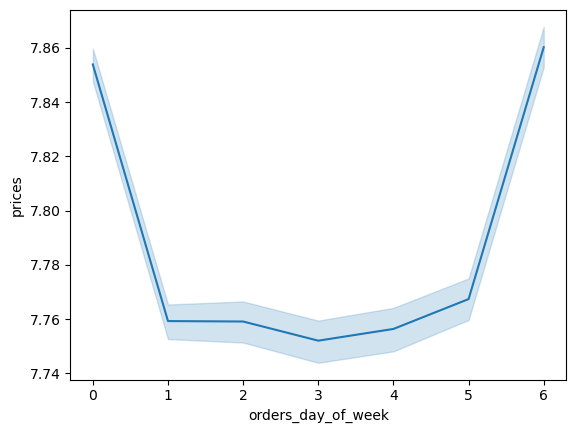

In [40]:
# Create a line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [ ]:
# The translucent blue bands around the line are called error bands
# They represent confidence intervals 
# If this line were a prediction, there would be a 95% probability that the predicted value would fall within the area of the error bands